In [ ]:
#!pip install tensorflow

In [ ]:
import os
import random
import numpy as np
from sklearn.model_selection import train_test_split
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import layers,models
import pandas as pd
from tensorflow.python.keras.losses import SparseCategoricalCrossentropy
from google.colab import files
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras.losses import BinaryCrossentropy
from tensorflow.python.keras.losses import binary_crossentropy
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from google.colab.patches import cv2_imshow

In [ ]:
#!pip install tensorflow


In [ ]:
files_with_mask = os.listdir("/content/drive/MyDrive/data/with_mask")

In [ ]:
files_without_mask = os.listdir("/content/drive/MyDrive/data/without_mask")

In [ ]:
label=[]
data=[]
size=[]
#with mask label 1
for img in os.listdir("/content/drive/MyDrive/data/with_mask"):
    img_arr=cv2.imread(os.path.join("/content/drive/MyDrive/data/with_mask",img))
    data.append(img_arr)
    label.append(1)
    size.append(img_arr.shape)
#without mask label 0
for img in os.listdir("/content/drive/MyDrive/data/without_mask"):
    img_arr=cv2.imread(os.path.join("/content/drive/MyDrive/data/without_mask",img))
    data.append(img_arr)
    label.append(0)
    size.append(img_arr.shape)

In [ ]:
pd.DataFrame(pd.Series(size).value_counts(),columns=['Number'])   

,Number
"(225, 225, 3)",665
"(428, 320, 3)",383
"(275, 183, 3)",255
"(100, 100, 3)",207
"(183, 275, 3)",181
...,...
"(152, 108, 3)",1
"(66, 42, 3)",1
"(216, 148, 3)",1
"(137, 86, 3)",1


In [ ]:
Size=128
for x in range(len(data)):
    data[x]=cv2.resize(data[x],(Size,Size))

In [ ]:
#data[0][0]

In [ ]:
data=np.array(data)
label=np.array(label)
X_train,X_test,y_train,y_test=train_test_split(data,label,test_size=.15,shuffle=True,random_state=44)

In [ ]:
print('X Train Shape is :',X_train.shape)
print('X Test Shape is :',X_test.shape)
print('Y Train Shape is :',y_train.shape)
print('Y Test Shape is :',y_test.shape)

X Train Shape is : (6445, 128, 128, 3)
X Test Shape is : (1138, 128, 128, 3)
Y Train Shape is : (6445,)
Y Test Shape is : (1138,)


In [ ]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),            
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(1,activation='sigmoid')
                       ])

In [ ]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
202/202 [==============================] - 12s 15ms/step - loss: 10.1985 - accuracy: 0.6669
Epoch 2/10
202/202 [==============================] - 3s 13ms/step - loss: 0.4769 - accuracy: 0.7846
Epoch 3/10
202/202 [==============================] - 3s 13ms/step - loss: 0.3694 - accuracy: 0.8493
Epoch 4/10
202/202 [==============================] - 3s 13ms/step - loss: 0.3129 - accuracy: 0.8776
Epoch 5/10
202/202 [==============================] - 3s 13ms/step - loss: 0.2291 - accuracy: 0.9137
Epoch 6/10
202/202 [==============================] - 3s 14ms/step - loss: 0.1815 - accuracy: 0.9449
Epoch 7/10
202/202 [==============================] - 3s 14ms/step - loss: 0.1216 - accuracy: 0.9597
Epoch 8/10
202/202 [==============================] - 3s 14ms/step - loss: 0.1223 - accuracy: 0.9600
Epoch 9/10
202/202 [==============================] - 3s 13ms/step - loss: 0.0919 - accuracy: 0.9715
Epoch 10/10
202/202 [==============================] - 3s 13ms/step - loss: 0.1187 - accu

In [ ]:
#cnn.save('my_model.h5')
#files.download('my_model.h5')

In [ ]:
#cnn.evaluate(X_test,y_test)

In [ ]:
#y_pred = cnn.predict(X_test)

In [ ]:
#y_pred

In [ ]:
#y_classes = [np.argmax(element) for element in y_pred]
#print((y_classes))

In [ ]:
model_path = "/content/drive/MyDrive/my_model.h5"
loaded_model = load_model(model_path)

In [ ]:
loaded_model.evaluate(X_test,y_test)

36/36 [==============================] - 0s 8ms/step - loss: 0.3836 - accuracy: 0.9279


[0.383563756942749, 0.927943766117096]

In [ ]:
#X_test[0]

In [ ]:
y_pred=loaded_model.predict(X_test)

In [ ]:
img_pred=cv2.imread(os.path.join("/content/drive/MyDrive/data/without_mask/without_mask_1.jpg"))

In [ ]:
#mg_pred

In [ ]:
Size=128
# for x in range(len(data)):
img_pred=cv2.resize(img_pred,(Size,Size))

#resized_img = cv2.resize(img_pred, (128,128))

In [ ]:
img_pred.shape

(128, 128, 3)

In [ ]:
data_img_test=[]
data_img_test.append(img_pred)
data1=np.array(data_img_test)

In [ ]:
data1.shape

(1, 128, 128, 3)

In [ ]:
y_pred=loaded_model.predict(data1)

In [ ]:
X_test.shape


(1138, 128, 128, 3)

In [ ]:
#X_test[0]

In [ ]:
for i in y_pred:
  if i > 0.5:
    print("Prediction: Class 1")
  else:
    print("Prediction: Class 0")

Prediction: Class 0


In [ ]:
!pip install opencv-python-headless


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!wget https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml


--2023-03-28 21:46:23--  https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml [following]
--2023-03-28 21:46:24--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.02s   

2023

<ipython-input-36-e357c3b7feb8>:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  face_array = np.array(face_list)


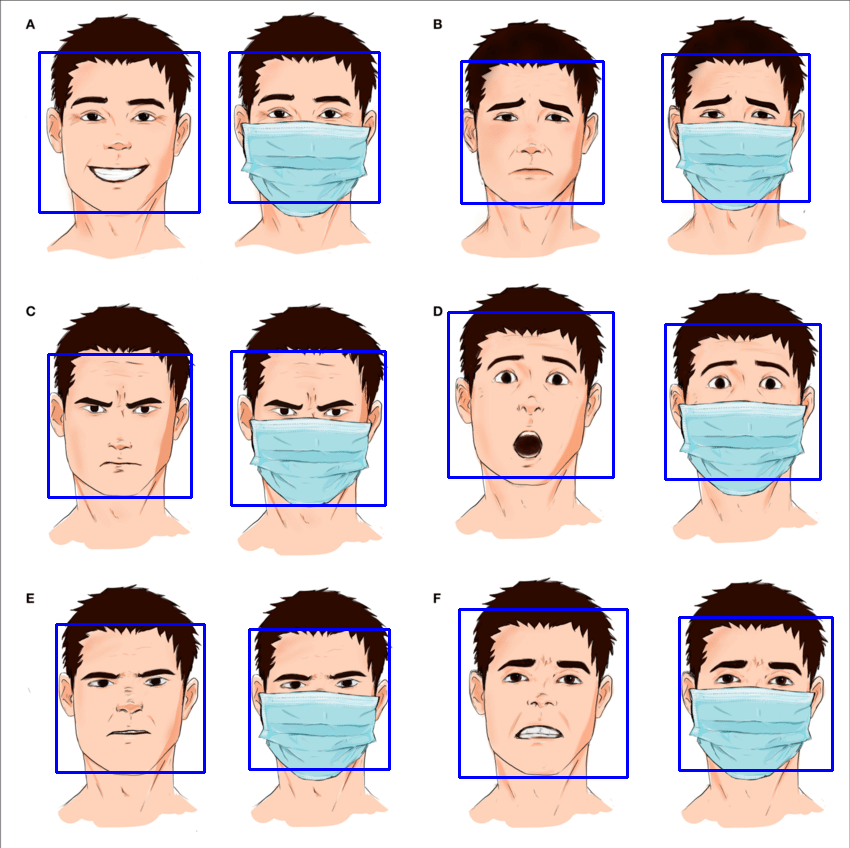

[(662, 54), (229, 52), (461, 61), (39, 52), (48, 354), (231, 351), (448, 312), (665, 324), (459, 609), (679, 617), (56, 624), (249, 629)]


In [ ]:
import cv2
#from google.colab.patches import cv2_imshow
# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Read the input image
img = cv2.imread('/content/face_unmask2.png')
#print(img)
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
#print(faces)
#Draw rectangle around the faces
face_list = []
position=[]
for (x, y, w, h) in faces:
  position.append((x,y))
  #print(x,y)
  cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
  face = img[y:y+h, x:x+w]
  face_list.append(face)
face_array = np.array(face_list)
cv2_imshow(img)
#print(face.shape)
print(position)

In [ ]:
Size=128
for x in range(len(face_array)):
    face_array[x]=cv2.resize(face_array[x],(Size,Size))

In [ ]:
face_array.shape

(12,)

In [ ]:
#face_array_reshaped = face_array[0].reshape((128, 128, 1))

In [ ]:
test_img_test=[]
for i in face_array:
  test_img_test.append(i)
testing=np.array(test_img_test)

In [ ]:
final_pred=loaded_model.predict(testing)

In [ ]:
label=[]
for i in final_pred:
  if i > 0.5:
    #print("Mask")
    label.append("mask")
  else:
    label.append("No mask")
    #print("No Mask")

In [ ]:
print(label)

['mask', 'mask', 'No mask', 'No mask', 'No mask', 'mask', 'No mask', 'mask', 'No mask', 'mask', 'No mask', 'mask']


In [ ]:
print(len(position))

12


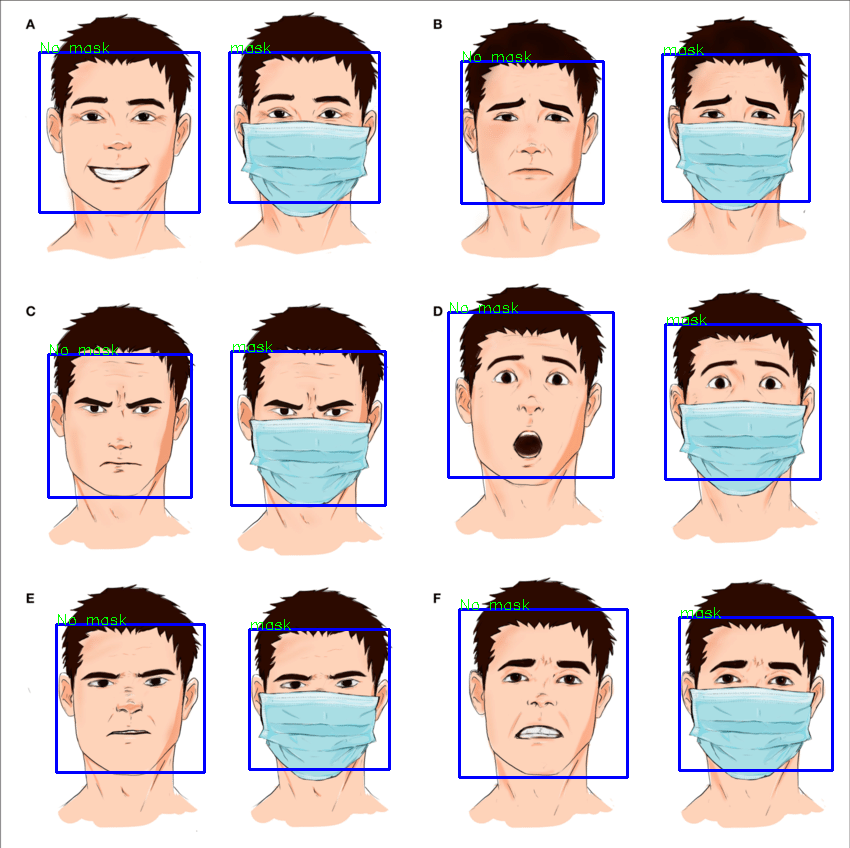

In [ ]:
for i in range(len(label)):
  cv2.putText(img, label[i], position[i], cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0),1)
cv2_imshow(img)